In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


In [6]:
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

print(X.shape)
print(y_true.shape)
print(type(X))

(300, 2)
(300,)
<class 'numpy.ndarray'>


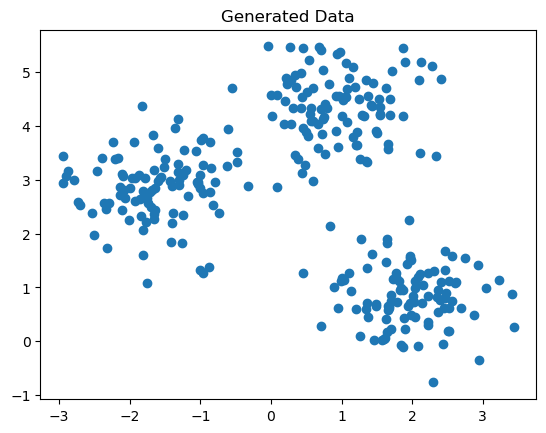

In [7]:
plt.scatter(X[:, 0], X[:, 1])
plt.title("Generated Data")
plt.show()

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)


KMeans(n_clusters=3, random_state=42)

In [10]:
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

In [12]:
np.bincount(y_kmeans)

array([100, 100, 100])

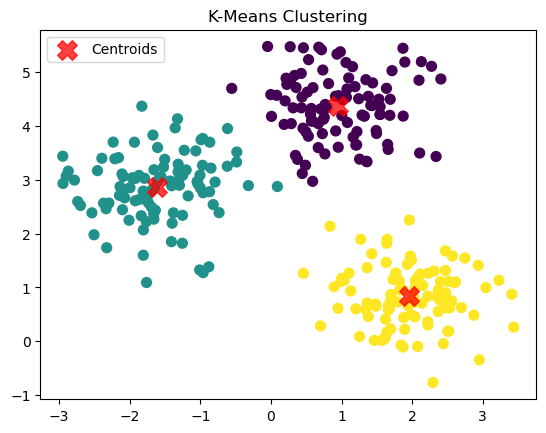

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()


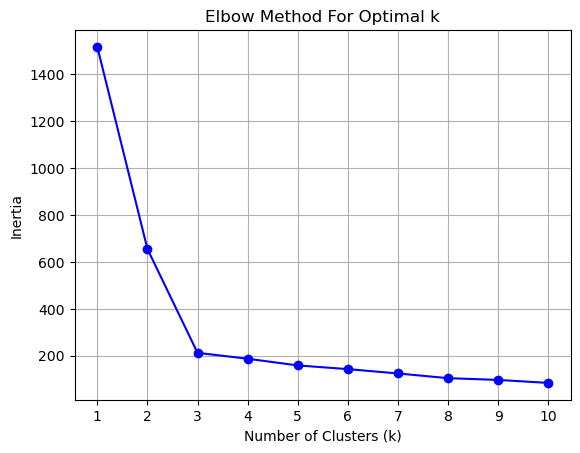

In [14]:
inertia = []

K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(K)
plt.grid(True)
plt.show()


Low inertia can mean closer to the centroids, but it can also mean that there is overfitting. Obviously lowest inertia is when each point is a cluster. So we find the elbow in the inertia curve to find the optimal number of clusters.

Inertia = sum of squared distances from each point to its assigned cluster centroid.


We use L2 norm as its smooth and differentiable. SSD also comes from centroid definition. L1 norm would make it geometric median. It is harder to compute and not the closed form. Centroid is the point that minimises SSD. MAE could be in K-Medians. There is no ground truth here for MSE or log loss. DBScan uses density, not distance. K-Means is not density based.

Hierarchical clustering is linkage based. You initially have n clusters for n points. You then merge the closest clusters until you have one cluster. The distance between clusters is defined by the linkage criterion, such as single, complete, or average linkage.
For single linkage, the distance between two clusters is the minimum distance between any two points in the clusters. For complete linkage, it is the maximum distance. For average linkage, it is the average distance between all pairs of points in the clusters.
In sklearn by default, it uses Ward's method, which minimizes the variance of the clusters being merged. This is similar to K-Means but does not require specifying the number of clusters in advance.

It is much slower - O(n^3) instead of O(nkd). But it does not require prior knowledge of number of clusters. K-Means can give poor results if number of clusters is not known. It can also give differnt results based on the centroids initialized.

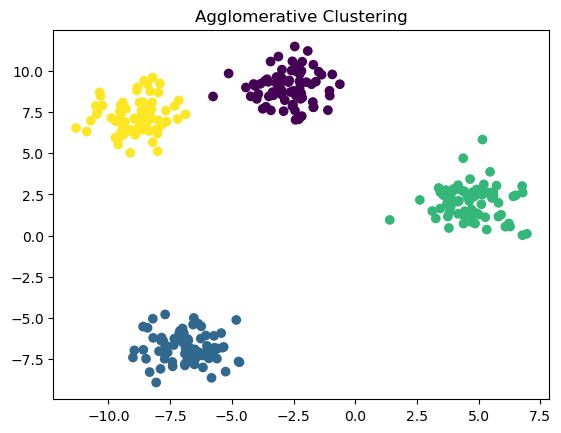

In [15]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt


X, y = make_blobs(n_samples=300, centers=4, random_state=42)


model = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = model.fit_predict(X)


plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.show()


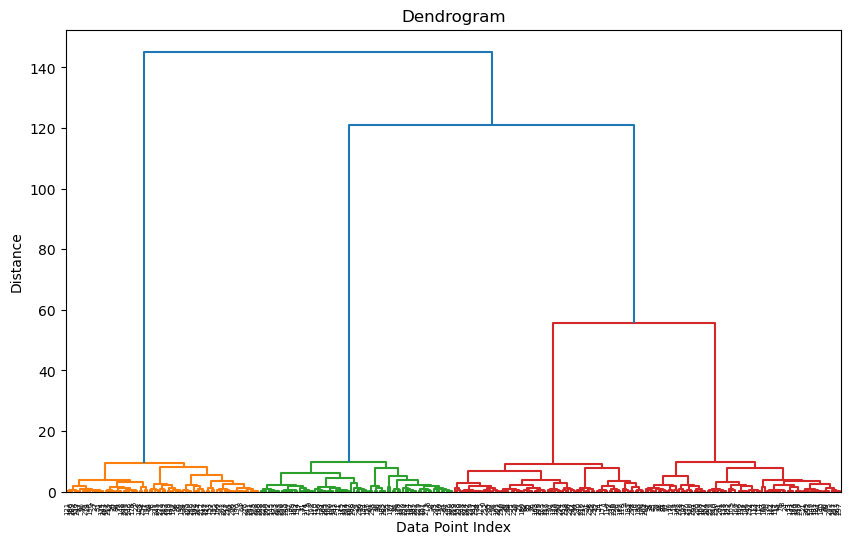

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel("Data Point Index")
plt.ylabel("Distance")
plt.show()


Leaves represent the data points. Initially each point is its own cluster. Vertical lines represent hte merging of two clusters. Height represents the distance at which the merge happened.
Draw a horizontal line before hte biggest jump in the vertical lines to find the optimal number of clusters. This is called the dendrogram.